In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics-0.json', 'r') as f:
    data0 = json.load(f)
print(data0)

{'variance_metrics': {'full_set_var_sum': 0.8083503324190945, 'full_set_var_values': [0.04198922358603414, 0.032981136874841506, 0.025983175393529474, 0.0235379249070626, 0.0174931695045069, 0.016894178111572688, 0.015953670425451094, 0.015226488613183611, 0.015144816160444437, 0.014525511871737002, 0.013861940729466483, 0.013108334778331485, 0.012609335538431103, 0.012410754131184313, 0.011551280039261926, 0.011343396333679843, 0.011034595640995095, 0.010999976414707832, 0.010790415705458344, 0.010439012213042656, 0.009924209857501668, 0.009857690870333747, 0.009526268973738976, 0.00947078540452659, 0.00937993907265188, 0.009178228121881616, 0.00905681909961783, 0.008871114145240727, 0.008626033116999802, 0.008410257565973868, 0.008317002564739022, 0.008264438643803449, 0.008146200172874825, 0.00807005729979575, 0.007817981202203388, 0.007719985482106948, 0.007477740467790053, 0.0074268843063806525, 0.0072607638195428675, 0.007161419158272516, 0.007091058926217765, 0.00698630824829884

In [3]:
with open('run-metrics-1.json', 'r') as f:
    data1 = json.load(f)
print(data1)

{'variance_metrics': {'full_set_var_sum': 0.8149231234098928, 'full_set_var_values': [0.043972975463898785, 0.035065998585555834, 0.02571983267488859, 0.023212317507458353, 0.01827461474372298, 0.01736680162294873, 0.016492580571073546, 0.015976859012137405, 0.015756930830405292, 0.014440196746786394, 0.01390490167517348, 0.01372128896373392, 0.012872387375764512, 0.01269668368890408, 0.011894718491490524, 0.011567098021195451, 0.011398244833657705, 0.01101541766895534, 0.010919164356587565, 0.010565264846230335, 0.010194533633724709, 0.01006512546941161, 0.009742431743842726, 0.009527811145814935, 0.00945643030054627, 0.0092654562362907, 0.009084724554462159, 0.008960023375827443, 0.00878065109355378, 0.008517534506073279, 0.008442670307311259, 0.008311366577389474, 0.008043566590934671, 0.007997620841950336, 0.007900963103900344, 0.007654627018161809, 0.00748174798293678, 0.007376475920327005, 0.007184745355684356, 0.0071252752206925505, 0.007105137928259631, 0.006983989712659589, 0.

In [4]:
with open('run-metrics-2.json', 'r') as f:
    data2 = json.load(f)
print(data2)

{'variance_metrics': {'full_set_var_sum': 0.8103913758089027, 'full_set_var_values': [0.04188038111081947, 0.03186244169849457, 0.026138037429748705, 0.019905717750246847, 0.01864869344290363, 0.017615749061565385, 0.015885471853052367, 0.015700097180336794, 0.015481489262372177, 0.014274613441129267, 0.013538896774176313, 0.013291719526168052, 0.012803064991036717, 0.012528366996071067, 0.01186663470443899, 0.011615207275638707, 0.011204298337768091, 0.0110882350070542, 0.01091866658459975, 0.010471753634651072, 0.010227392744040789, 0.010023062652512647, 0.009748172037393109, 0.009738624232487038, 0.009542840662994014, 0.009356162100005965, 0.009149790690752292, 0.00903766296590454, 0.008766463477225055, 0.008554864539357117, 0.008431739799392232, 0.008357001470037052, 0.008223560154196875, 0.008061786009389576, 0.008019244879603649, 0.0077863443182676385, 0.007511742633378934, 0.007397611203025051, 0.0073669076644716025, 0.00719434394163597, 0.007130084034675917, 0.00703920493425981

In [5]:
variance_metrics0 = data0['variance_metrics']
modelling_metrics0 = data0['modelling_metrics']

variance_metrics1 = data1['variance_metrics']
modelling_metrics1 = data1['modelling_metrics']

variance_metrics2 = data2['variance_metrics']
modelling_metrics2 = data2['modelling_metrics']

subset_sizes = modelling_metrics0['subset_size']

In [6]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [7]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [8]:
results = {}

In [9]:
results['subset_size'] = subset_sizes
results['r2_value0'] = variance_metrics0['r2_values']
results['r2_value1'] = variance_metrics1['r2_values']
results['r2_value2'] = variance_metrics2['r2_values']
results['test_accuracy'] = modelling_metrics0['test_accuracies']
results['test_loss'] = modelling_metrics0['test_losses']

In [10]:
for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [11]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,anli_r3_loss,anli_r3_accuracy,snli_loss,snli_accuracy,sick_loss,sick_accuracy
0,39269,0.806106,0.812784,0.808240,0.787225,0.545805,1.885705,0.305000,0.776166,0.697476,1.585136,0.462903
1,78538,0.807669,0.814176,0.809613,0.797193,0.506580,1.611842,0.316667,0.650105,0.741551,1.241314,0.512026
2,117807,0.808078,0.814645,0.809794,0.810110,0.490071,1.609456,0.305833,0.624721,0.745623,1.238344,0.523441
3,157076,0.808453,0.814634,0.810166,0.820586,0.470391,1.793000,0.314167,0.589071,0.771173,1.304204,0.549531
4,196345,0.808589,0.814953,0.810229,0.824654,0.452976,1.603129,0.304167,0.557331,0.773616,1.421984,0.519568
5,235614,0.808588,0.814988,0.810446,0.827502,0.458700,2.009252,0.310833,0.586649,0.789393,1.456779,0.542805
6,274883,0.808760,0.815032,0.810294,0.822518,0.446166,1.701159,0.320833,0.572921,0.766897,1.113724,0.558092
7,314152,0.808881,0.815113,0.810378,0.836452,0.438191,2.013321,0.317500,0.585457,0.786238,1.725231,0.530575
8,353421,0.808713,0.814483,0.810579,0.821603,0.461000,1.873643,0.315833,0.545302,0.786441,1.158356,0.585609
9,392690,0.808577,0.815191,0.810673,0.836452,0.438191,2.013321,0.317500,0.585457,0.786238,1.725231,0.530575


In [12]:
results_df['mean_odd_accuracy'] = results_df[['snli_accuracy', 'snli_accuracy', 'sick_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['snli_loss', 'snli_loss', 'sick_loss']].mean(axis=1)
results_df['r2_value'] = results_df[['r2_value0', 'r2_value1', 'r2_value2']].mean(axis=1)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,anli_r3_loss,anli_r3_accuracy,snli_loss,snli_accuracy,sick_loss,sick_accuracy,mean_odd_accuracy,mean_odd_loss,r2_value
0,39269,0.806106,0.812784,0.808240,0.787225,0.545805,1.885705,0.305000,0.776166,0.697476,1.585136,0.462903,0.619285,1.045823,0.809043
1,78538,0.807669,0.814176,0.809613,0.797193,0.506580,1.611842,0.316667,0.650105,0.741551,1.241314,0.512026,0.665043,0.847175,0.810486
2,117807,0.808078,0.814645,0.809794,0.810110,0.490071,1.609456,0.305833,0.624721,0.745623,1.238344,0.523441,0.671562,0.829262,0.810839
3,157076,0.808453,0.814634,0.810166,0.820586,0.470391,1.793000,0.314167,0.589071,0.771173,1.304204,0.549531,0.697292,0.827449,0.811084
4,196345,0.808589,0.814953,0.810229,0.824654,0.452976,1.603129,0.304167,0.557331,0.773616,1.421984,0.519568,0.688933,0.845549,0.811257
5,235614,0.808588,0.814988,0.810446,0.827502,0.458700,2.009252,0.310833,0.586649,0.789393,1.456779,0.542805,0.707197,0.876692,0.811341
6,274883,0.808760,0.815032,0.810294,0.822518,0.446166,1.701159,0.320833,0.572921,0.766897,1.113724,0.558092,0.697296,0.753189,0.811362
7,314152,0.808881,0.815113,0.810378,0.836452,0.438191,2.013321,0.317500,0.585457,0.786238,1.725231,0.530575,0.701017,0.965382,0.811457
8,353421,0.808713,0.814483,0.810579,0.821603,0.461000,1.873643,0.315833,0.545302,0.786441,1.158356,0.585609,0.719497,0.749654,0.811258
9,392690,0.808577,0.815191,0.810673,0.836452,0.438191,2.013321,0.317500,0.585457,0.786238,1.725231,0.530575,0.701017,0.965382,0.811481


(0.4, 0.6)

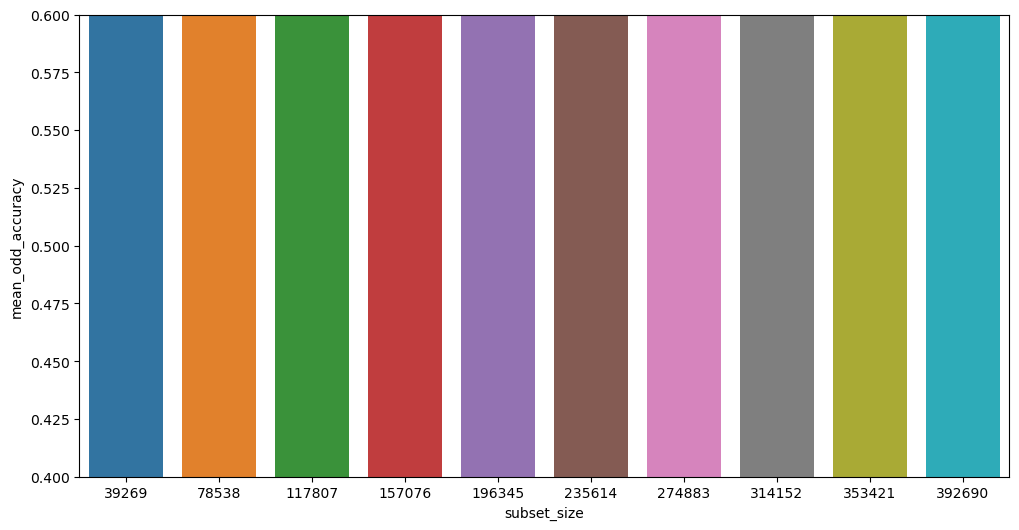

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], ax=ax)
plt.ylim(0.4, 0.6)

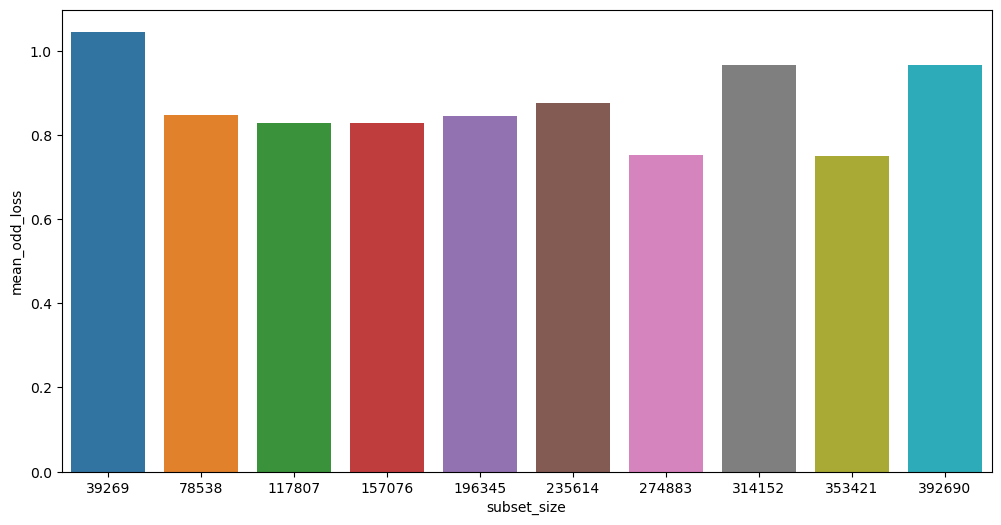

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])

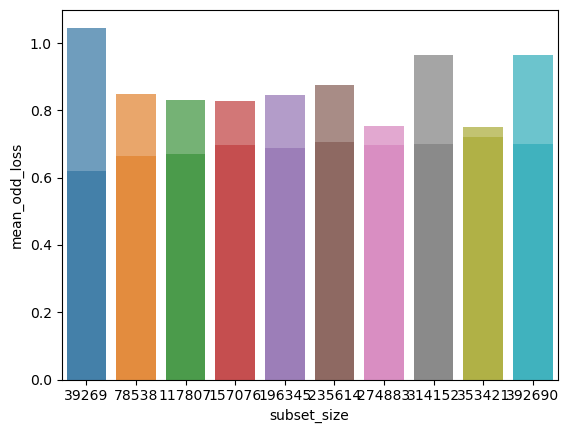

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)

[(0.4, 0.8)]

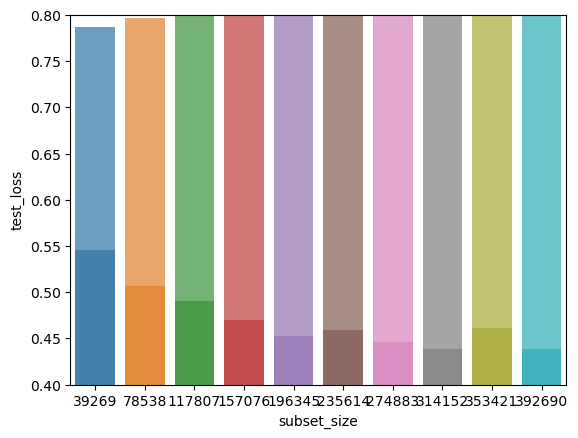

In [17]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

In [18]:
full_set_var_sum = np.mean((variance_metrics0['full_set_var_sum'], variance_metrics1['full_set_var_sum'], variance_metrics2['full_set_var_sum']))

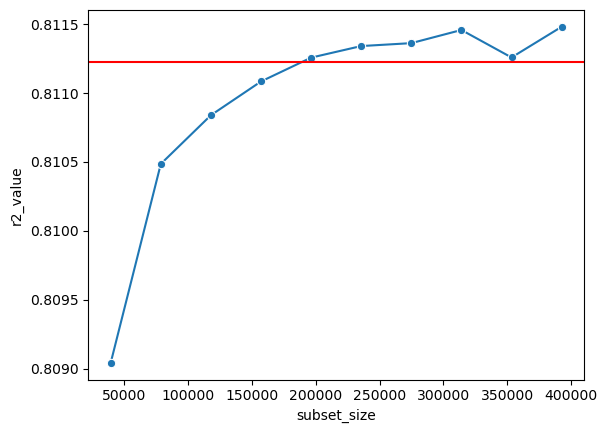

In [19]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(full_set_var_sum, color='red')

In [20]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized

<Axes: xlabel='subset_size'>

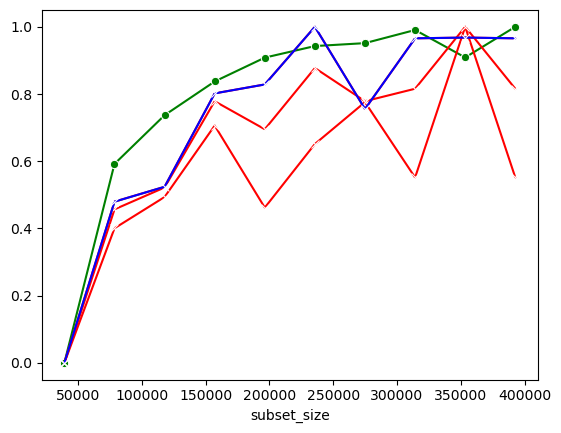

In [24]:
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['r2_value']), marker="o", color='green')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['mean_odd_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['snli_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['sick_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['snli_accuracy']), marker="x", color='blue')

<Axes: xlabel='subset_size', ylabel='snli_accuracy'>

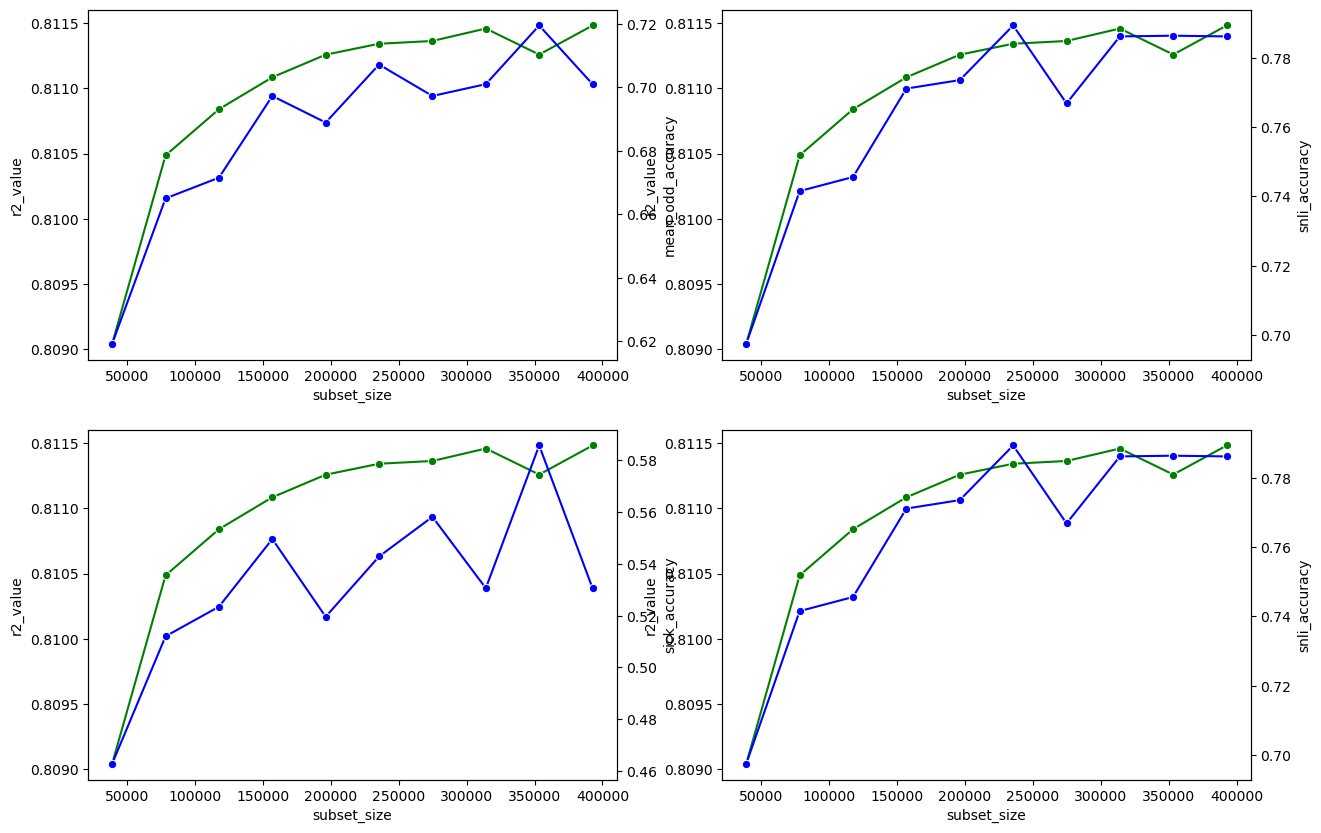

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['snli_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sick_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['snli_accuracy'], color="b", ax=ax4, marker="o")

(0.1, 2.0)

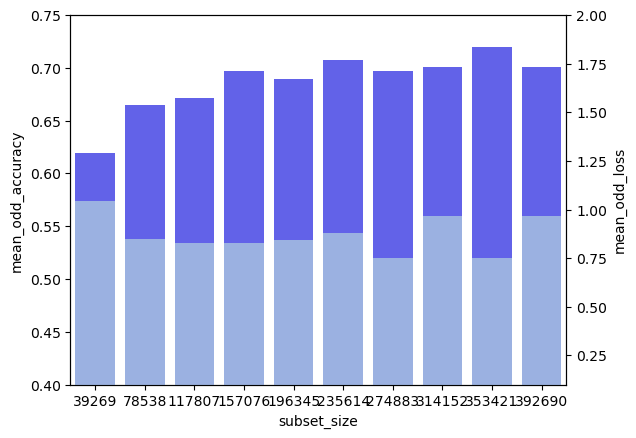

In [34]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.4, 0.75)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.1, 2.0)

(0.2, 0.9)

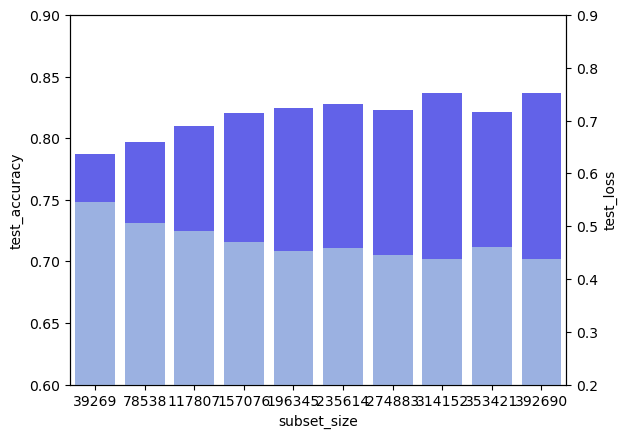

In [39]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.6, 0.9)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.2, 0.9)

In [40]:
results_df.to_csv('../analysis_results/mnli.csv', index=False)